# 누락 데이터 처리
### 누락 데이터 확인

In [1]:
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset("titanic")

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df['deck'].value_counts(dropna=False)

deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64

- 누락 데이터를 찾는 직접적인 방법으로 isnull() 메서드와 notnull() 메서드가 있다.
- 같은 기능을 수행하는 isna() 메서드와 notna() 메서드를 사용해도 된다.

In [22]:
df.head().isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [23]:
df.head().notnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True


In [29]:
df.head().isnull().sum(axis=0)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           3
embark_town    0
alive          0
alone          0
dtype: int64

In [30]:
!pip install missingno

  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/bd/37/89f19c8c05505d0601ed5650156e50eb881ae3918786c8fd7262b4ee66d3/scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 23.5 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


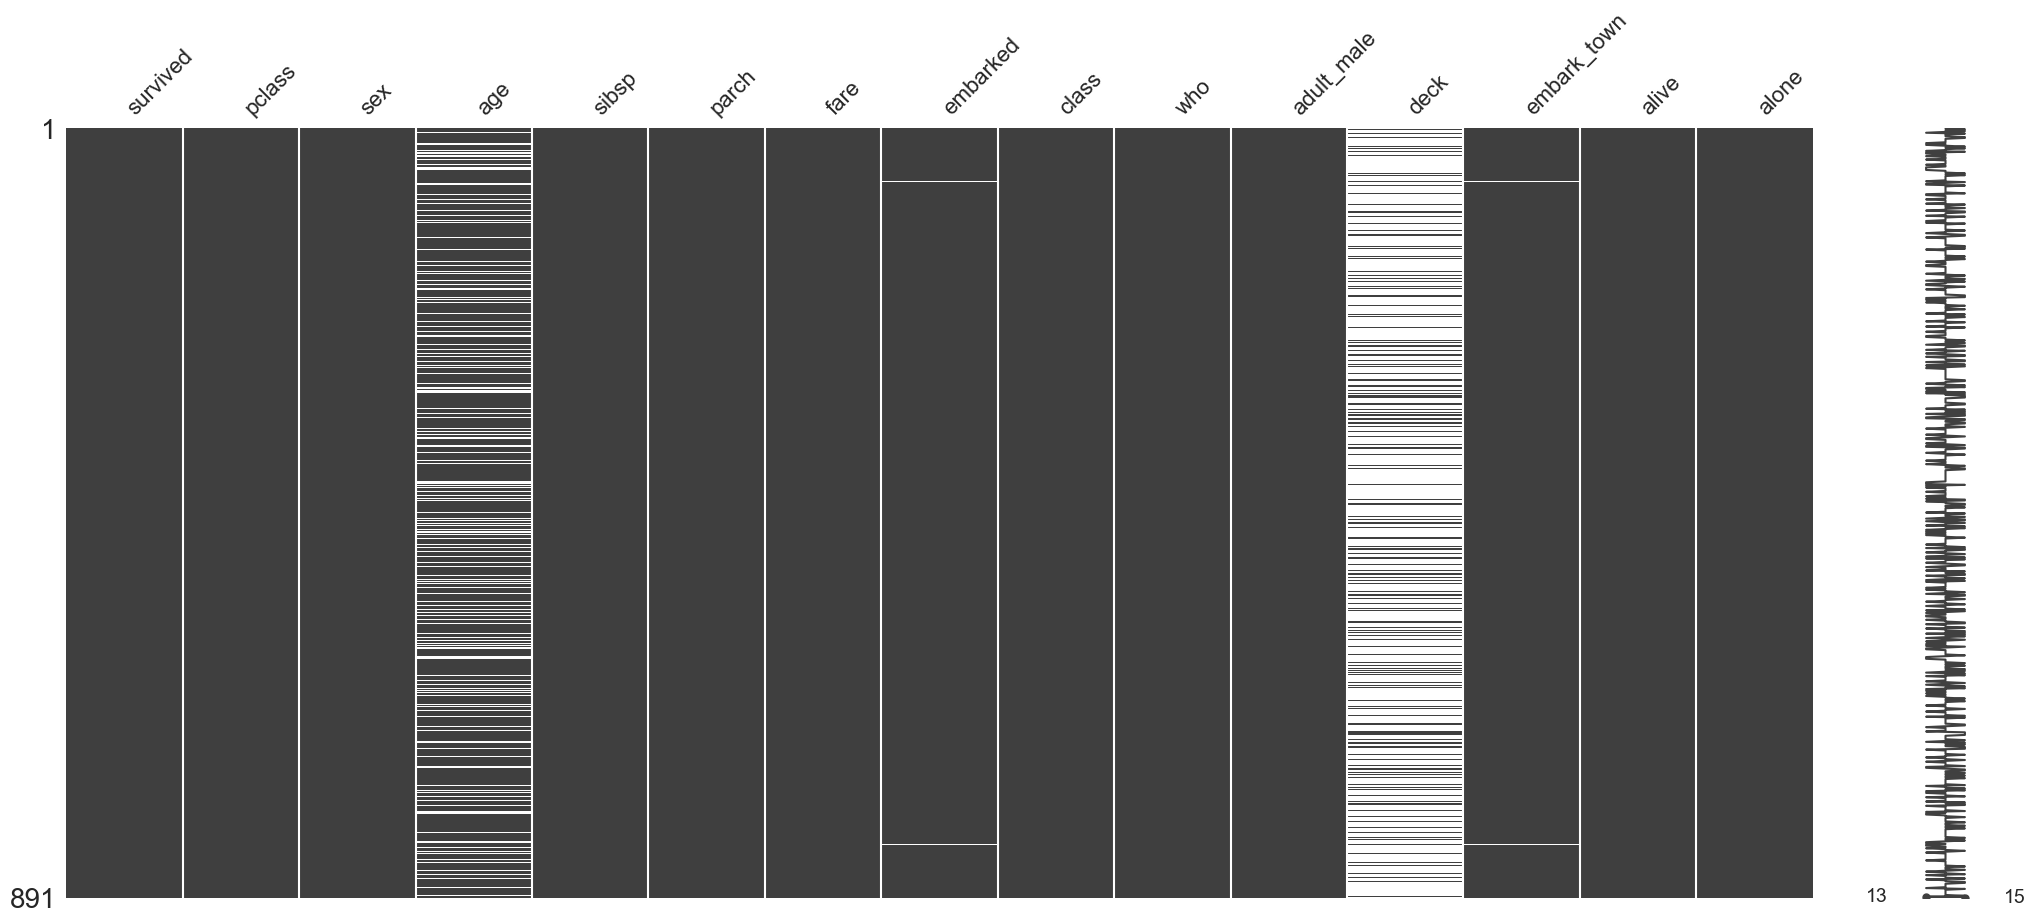

In [36]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

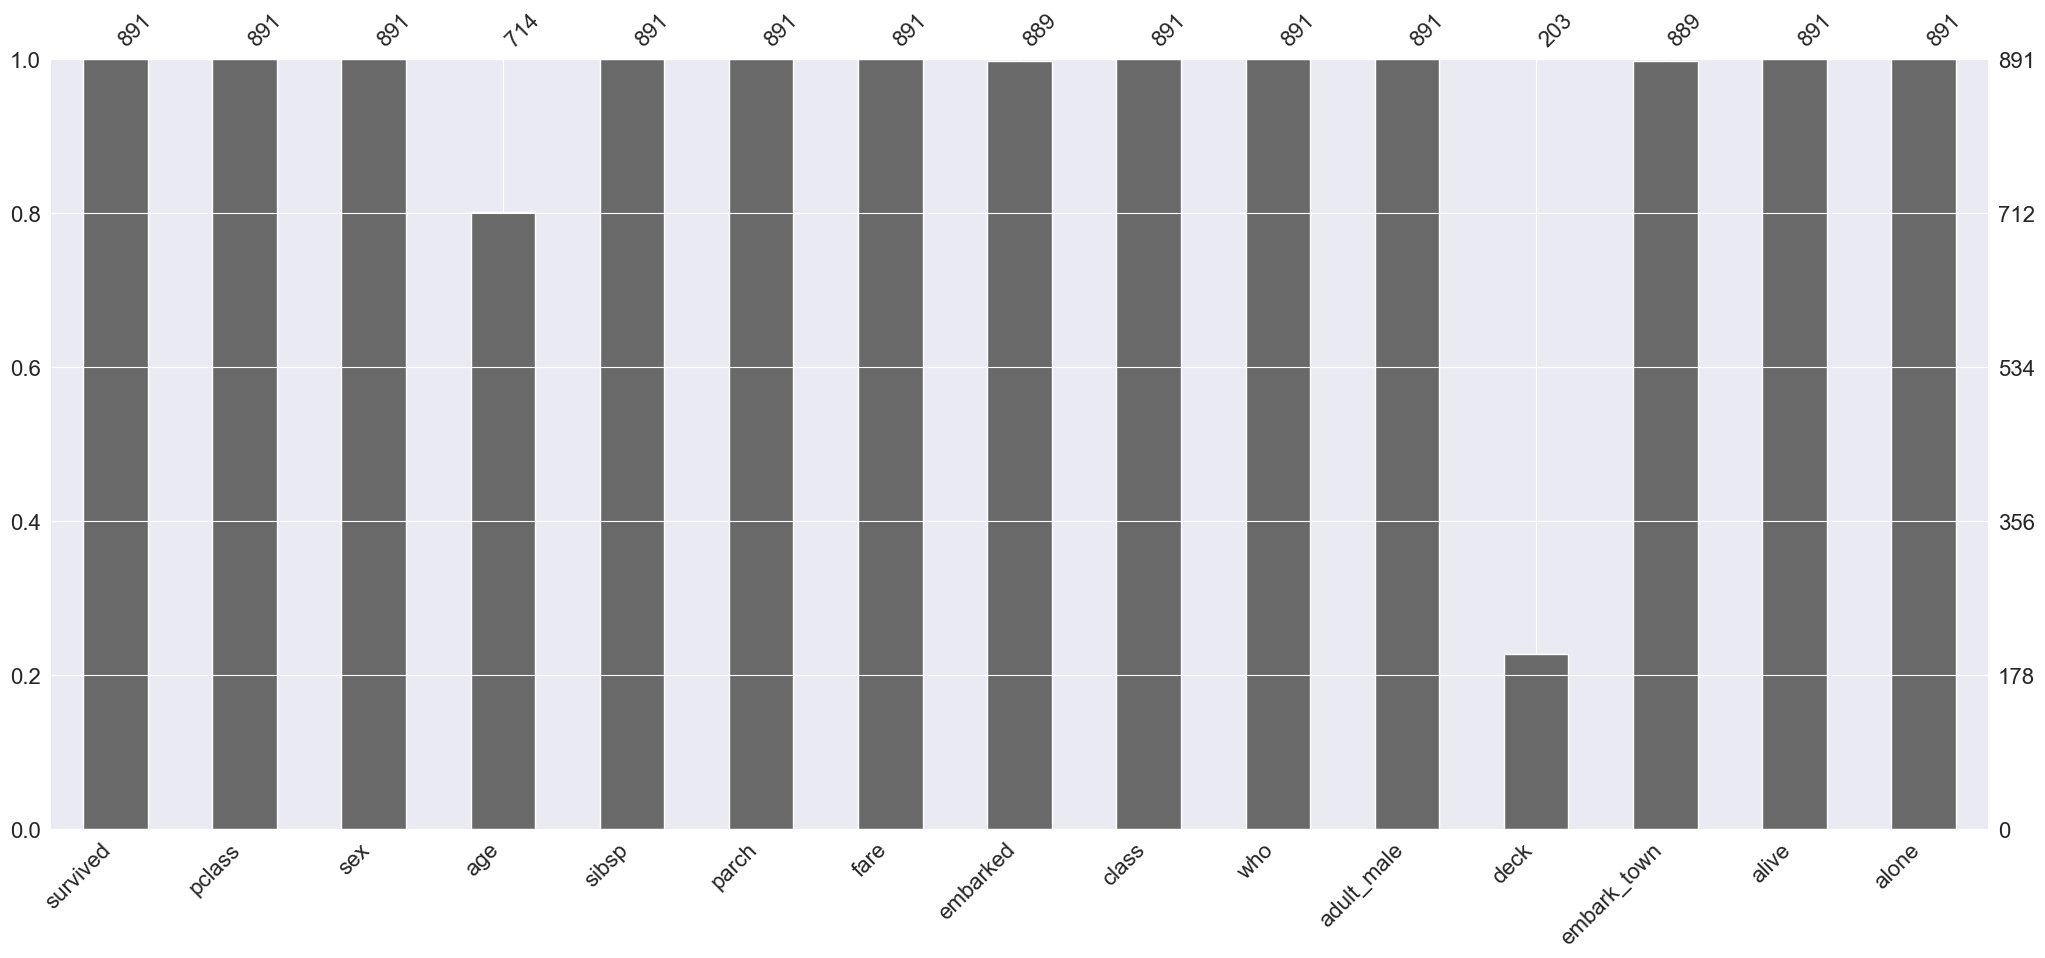

In [37]:
msno.bar(df)
plt.show()

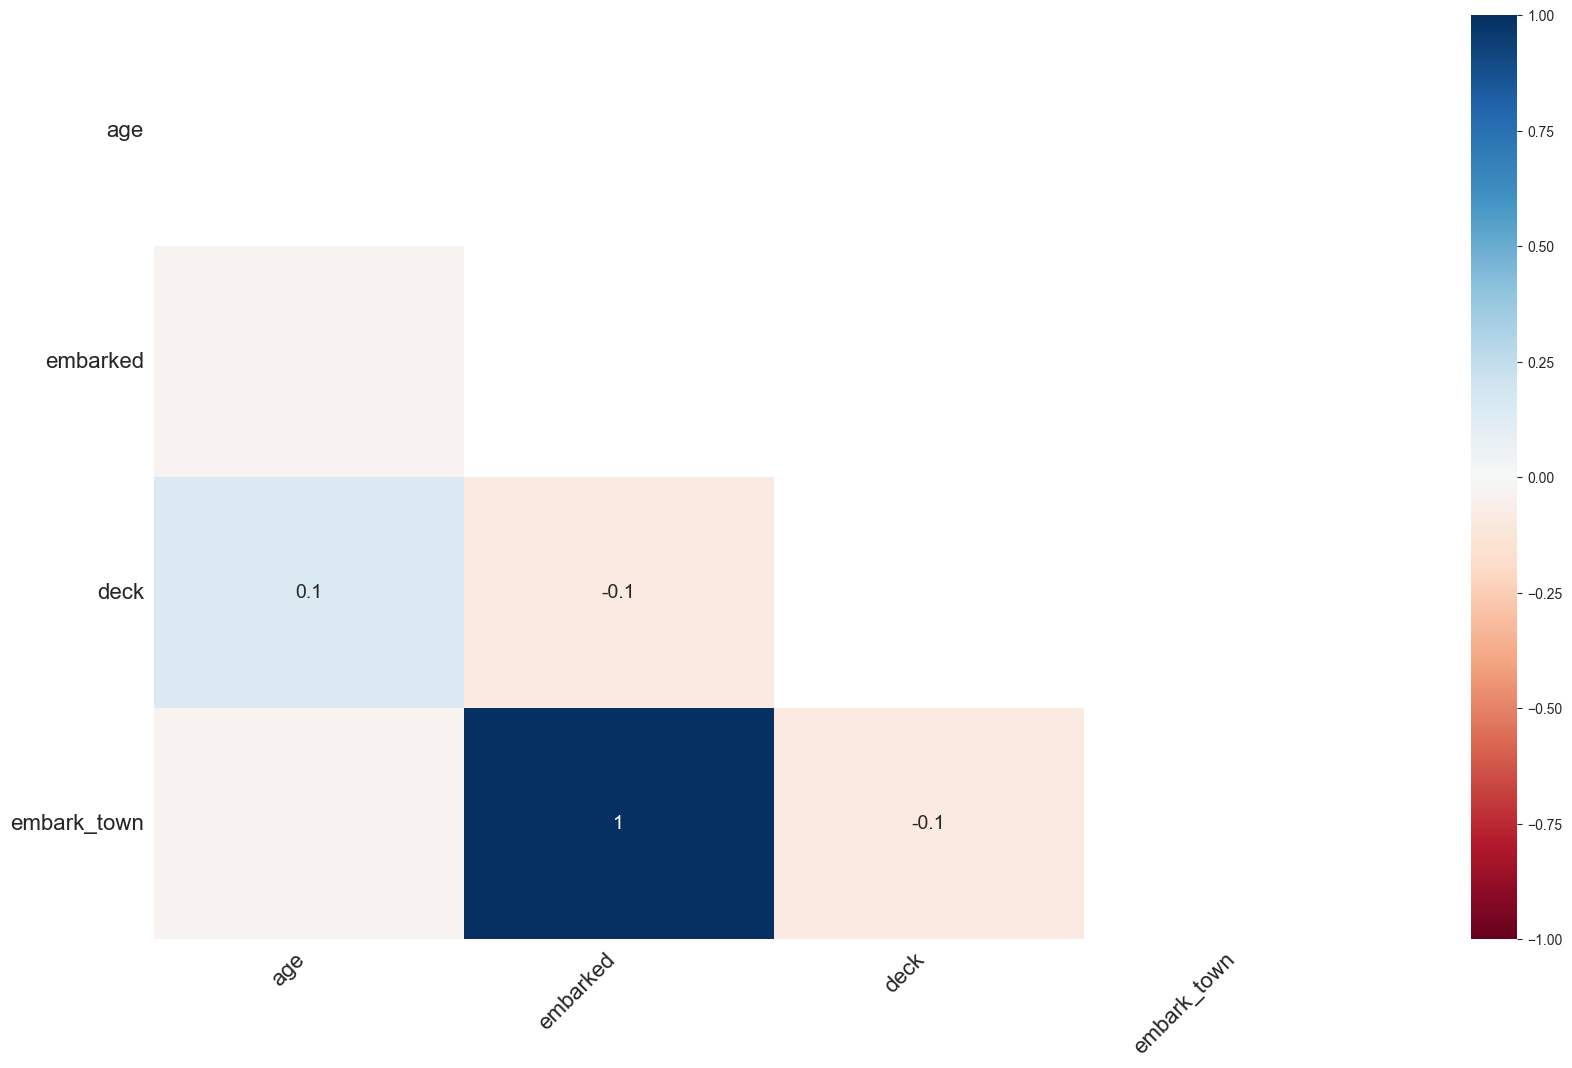

In [39]:
msno.heatmap(df)
plt.show()

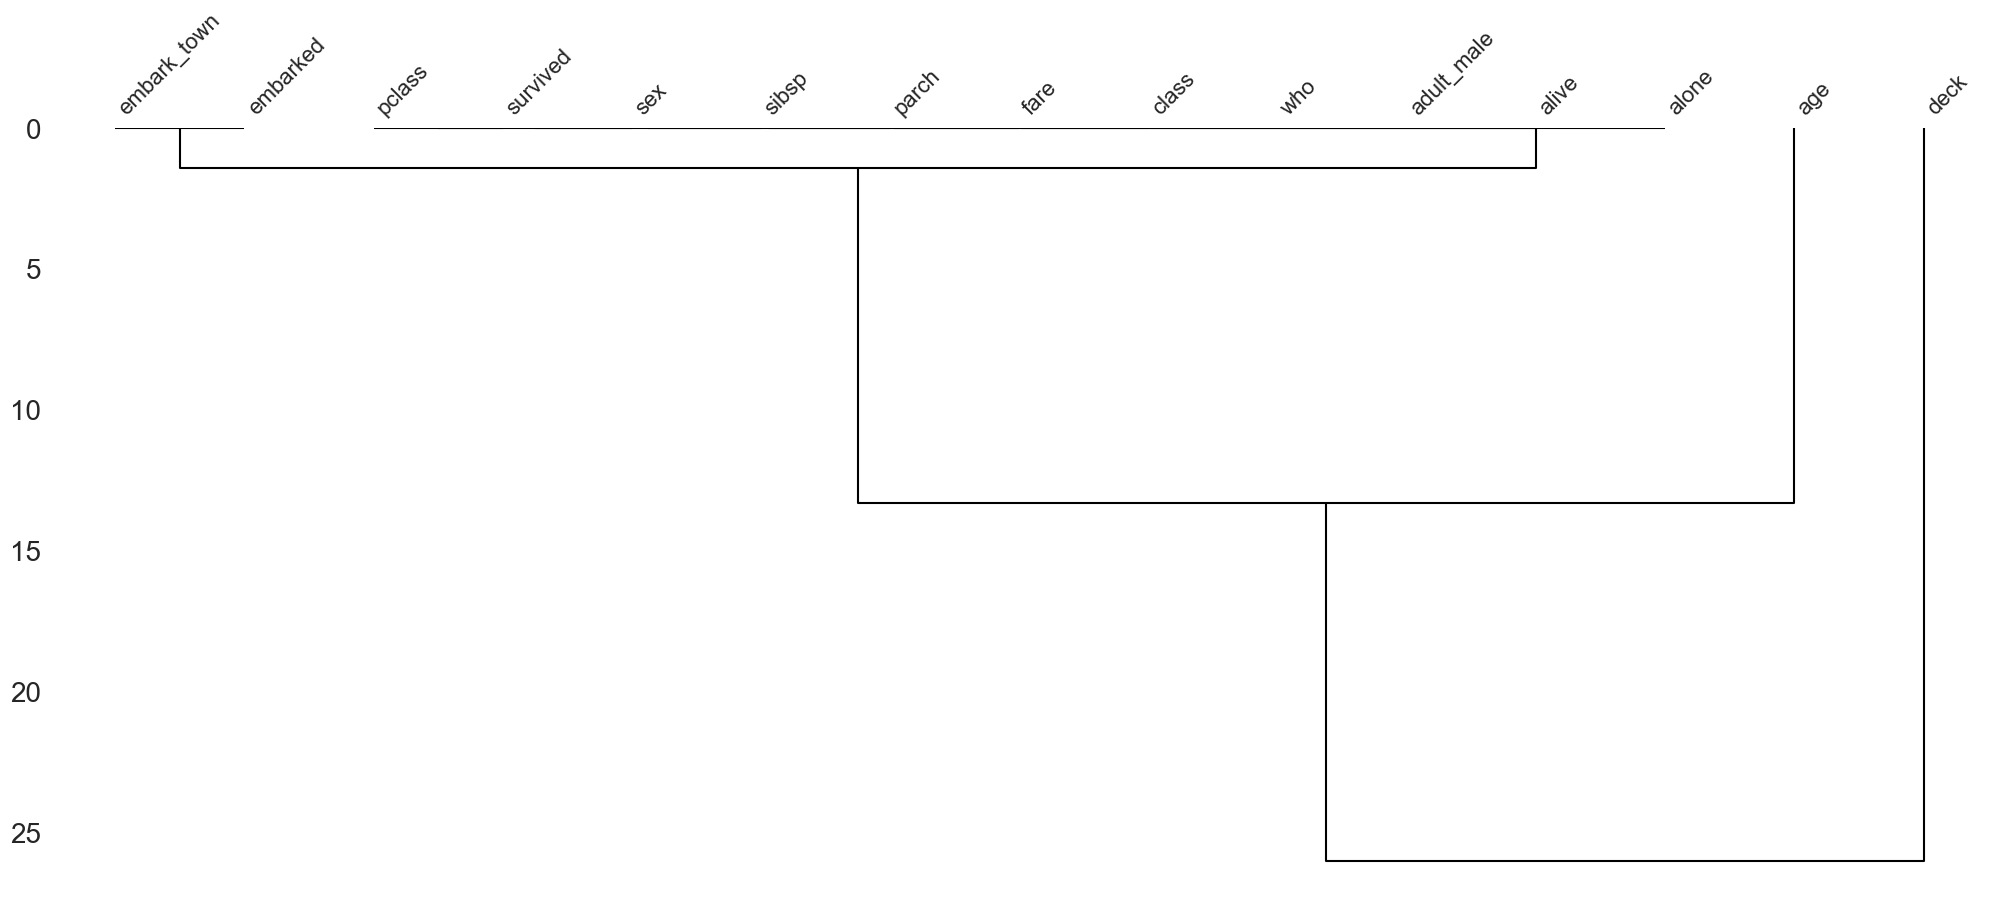

In [40]:
msno.dendrogram(df)
plt.show()

### 누락데이터 표현
- NaN(np.nan)
    - NumPy 데이터 타입에서 사용
    - 자료형이 np.float64 또는 object로 강제 변환 될 수 있는 단점이 있음
- pd.NaT
    - NumPy의 np.datetime, np.timedelta64
    - pandas의 PeriodDtype에서 사용
- pd.NA
    - StringDtype, int64Dtype, Float64Dtype, BooleanDtype, ArrowDtype에서 사용

In [43]:
import pandas as pd

# 결측값이 포함되면 전체 열이 float으로 변환되는 문제가 있다.
ser1 = pd.Series([1, 2, None])
ser1

0    1.0
1    2.0
2    NaN
dtype: float64

In [45]:
ser2 = pd.Series([1, 2, None], dtype="Int64")
ser2

0       1
1       2
2    <NA>
dtype: Int64

### 누락데이터 제거
- 누락데이터가 포함된 열 또는 행을 삭제하는 방법

In [49]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')

df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [52]:
df_thresh = df.dropna(axis=1, thresh=500)
print(df_thresh.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [54]:
df_age = df.dropna(subset=['age'], how='any', axis=0)
print(len(df_age))

714


In [56]:
df_age_deck = df.dropna(subset=['age', 'deck'], how='all', axis=0)
print(len(df_age_deck))

733


### 누락데이터의 대체


In [57]:
import seaborn as sns

df = sns.load_dataset('titanic')

df['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [59]:
mean_age = df['age'].mean(axis=0)
df['age'] = df['age'].fillna(mean_age)

df['age'].head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64

In [60]:
import seaborn as sns

df = sns.load_dataset('titanic')

df['embark_town'][825:830]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object

In [63]:
most_freq = df['embark_town'].value_counts(dropna=True).idxmax()
print(most_freq)

most_freq2 = df['embark_town'].mode()[0]
print(most_freq2)

Southampton
Southampton


In [64]:
df['embark_town'] = df['embark_town'].fillna(most_freq2)
df['embark_town'][825:830]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object

In [65]:
import seaborn as sns

df = sns.load_dataset('titanic')

df['embark_town'][825:831]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
830      Cherbourg
Name: embark_town, dtype: object

In [68]:
df['embark_town'] = df['embark_town'].ffill()
print(df['embark_town'][825:831])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829     Queenstown
830      Cherbourg
Name: embark_town, dtype: object


In [70]:
import seaborn as sns

df = sns.load_dataset('titanic')

df['embark_town'] = df['embark_town'].bfill()
print(df['embark_town'][825:831])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829      Cherbourg
830      Cherbourg
Name: embark_town, dtype: object


## 중복 데이터 처리
- 행의 레코드가 중복되는지 여부를 확인하려면 duplicated() 메서드를 이용한다.

In [71]:
import pandas as pd

df = pd.DataFrame({'c1': ['a', 'a', 'b', 'a', 'b'],
                   'c2': [1, 1, 1, 2, 2],
                   'c3': [1, 1, 2, 2, 2]
                   })

print(df)

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


- duplicated() 메서드는 keep='first' 옵션이 기본 적용되는데, 2개의 중복행 중에서 가장 처음에 나오는 0행은 중복이 아니라고 판정하고 이후에 나오는 모든 중복행들을 모두 True로 표시한다.

In [72]:
df_dup_first = df.duplicated()
print(df_dup_first)

0    False
1     True
2    False
3    False
4    False
dtype: bool


- duplicated() 메서드에 keep='last'옵션을 적용하면 데이터프레임에서 중복되는 행이면서 가장 마지막 행이 아닌 경우에만 TRUE로 판정한다.
- 가장 마지막 행을 중복으로 간주하지 않는다는 의미이다.

In [73]:
df_dup_last = df.duplicated(keep='last')
print(df_dup_last)

0     True
1    False
2    False
3    False
4    False
dtype: bool


- keep=False 옵션을 적용하면 데이터 프레임에서 중복되는 모든 행을 찾는다.
- 첫번째 행이든 마지막 행이든 중복되는 모든 행을 True로 표시한다.
- 중복된 값이 있는 모든 행이 중복으로 간주된다.

In [74]:
df_dup_false = df.duplicated(keep=False)
print(df_dup_false)

0     True
1     True
2    False
3    False
4    False
dtype: bool


In [75]:
col_dup = df['c2'].duplicated()
print(col_dup)

0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool


In [76]:
df.duplicated(subset=['c2'])

0    False
1     True
2     True
3    False
4     True
dtype: bool

### 중복데이터 제거
- 중복데이터를 제거하는 명령에는 drop_duplicated() 메서드가 있다.


In [78]:
import pandas as pd

df = pd.DataFrame({
    'c1':['a', 'a', 'b', 'a', 'b'],
    'c2':[1,1,1,2,1],
    'c3':[1,1,1,2,2]
})

print(df)

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   1
3  a   2   2
4  b   1   2


In [80]:
df2 = df.drop_duplicates()
print(df2)

  c1  c2  c3
0  a   1   1
2  b   1   1
3  a   2   2
4  b   1   2


In [81]:
df3 = df.drop_duplicates(keep='last')
print(df3)

  c1  c2  c3
1  a   1   1
2  b   1   1
3  a   2   2
4  b   1   2


In [83]:
df4 = df.drop_duplicates(keep=False)
print(df4)

  c1  c2  c3
2  b   1   1
3  a   2   2
4  b   1   2


- 특정 열을 기준으로 중복을 제거하려면 drop_duplicated() 메서드의 subset 매개변수에 '열 이름의 리스트'를 전달할 수 있다.

In [85]:
df5 = df.drop_duplicates(subset=['c2','c3'])
print(df5)

  c1  c2  c3
0  a   1   1
3  a   2   2
4  b   1   2


In [86]:
df6 = df.drop_duplicates(keep=False, subset=['c2','c3'])
print(df6)

  c1  c2  c3
3  a   2   2
4  b   1   2


# 데이터 정규화
## 단위 환산

In [88]:
import pandas as pd

df = pd.read_csv('./data/auto-mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model year', 'origin', 'name']

df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


- mpg는 갤런당 마일 단위이다. 리터당 킬로미터 단위로 변환해야한다.

In [90]:
mpg_to_kpl = 1.60934 / 3.78541

df['kpl'] = df['mpg'] * mpg_to_kpl

df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.652571
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.377143
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.652571


## 자료형 변환

In [113]:
import pandas as pd

df = pd.read_csv('./data/auto-mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model year', 'origin', 'name']

print(df.dtypes)


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object


In [110]:
print(df['horsepower'].unique())

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


In [114]:
import numpy as np

df['horsepower'] = df['horsepower'].replace('?', np.nan)
df = df.dropna(axis=0, subset=['horsepower'])
df['horsepower'] = df['horsepower'].astype('float')

print(df['horsepower'].dtype)

float64


In [117]:
print(df['origin'].unique())
df['origin'] = df['origin'].replace({1:'USA', 2:'EU', 3:'JAPAN'})

print(df['origin'].unique())
print(df['origin'].dtypes)

['USA' 'JAPAN' 'EU']
['USA' 'JAPAN' 'EU']
object


- 유한 개의 고유값이 반복적으로 나타나는 경우에는 범주형 데이터로 표현하는 것이 효율적이다.
- astype('category') 메서드를 이용하면 범주형 데이터로 변환된다.

In [119]:
df['origin'] = df['origin'].astype('category')
print(df['origin'].dtypes)

# 범주형을 다시 object 형으로 변환할 때는 astype('str') 사용
df['origin'] = df['origin'].astype('str')
print(df['origin'].dtypes)

category
object


# 범주형(카테고리) 데이터 처리
## 구간 분할
- 데이터 분석 알고리즘에 따라서는 연속 데이터를 그대로 사용하기 보다는 일정한 구간으로 나눠서 분석하는 것이 효율적인 경우가 있다.
- 이처럼 연속 변수를 일정한 구간으로 나누고 각 구간을 범주형 이산 변수로 변환하는 과정을 구간 분할이라고 한다.
- 판다스 cut() 한수를 이용하면 연속 데이터를 여러 구간으로 나누고 범주형 데이터로 변환할 수 있다.
- 경계값을 구하는 방법 중 하나는 Numpy histogram() 함수를 활용할 수 있다.
    - 나누려는 구간 개수를 bins 옵션에 입력하면 각 구간에 속하는 값의 개수와 경계값 리스트를 반환한다.

In [121]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/auto-mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model year', 'origin', 'name']

df['horsepower'] = df['horsepower'].replace('?', np.nan)
df = df.dropna(axis=0, subset=['horsepower'])
df['horsepower'] = df['horsepower'].astype('float')

count, bin_dividers = np.histogram(df['horsepower'], bins=3)
print(bin_dividers)


[ 46.         107.33333333 168.66666667 230.        ]


- 판다스의 cut() 함수 옵션을 설정한다.

In [123]:
bins_name = ['저출력', '보통출력', '고출력']

df['hp_bin'] = pd.cut(x=df['horsepower'], bins=bin_dividers, labels=bins_name, include_lowest=True)

df[['horsepower','hp_bin']].head(15)

,horsepower,hp_bin
0,130.0,보통출력
1,165.0,보통출력
2,150.0,보통출력
3,150.0,보통출력
4,140.0,보통출력
5,198.0,고출력
6,220.0,고출력
7,215.0,고출력
8,225.0,고출력
9,190.0,고출력


## 더미 변수
### 원핫인코딩
- 카테고리를 나타내는 범주형 데이터를 회귀 분석 등 머신러닝에서 바로 사용할 수 없는 경우가 있는데, 이럴 때에는 컴퓨타가 인식 가능한 입력 값으로 변환해야 한다.
- 숫자 0 또는 1로 표현되는 더미 변수를 사용한다.
- 여기서 0과 1은 수의 크고 작음을 나타내지 않고 어떤 특성이 있는지 없는지 여부만을 표시한다.
- 이처럼 범주형 데이터를 컴퓨터가 인식할 수 있도록 숫자 0과 1로만 구성하는 원핫벡터로 변환한다고 해서 원핫인코딩이라고 부른다.
- 판다스 get_dummies() 함수를 사용하면 범주형 변수의 모든 고유값을 각각 새로운 더미 변수로 변환한다.

In [126]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/auto-mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model year', 'origin', 'name']

df['horsepower'] = df['horsepower'].replace('?', np.nan)
df = df.dropna(axis=0, subset=['horsepower'])
df['horsepower'] = df['horsepower'].astype('float')

count, bin_dividers = np.histogram(df['horsepower'], bins=3)
print(bin_dividers)

bins_name = ['저출력', '보통출력', '고출력']

df['hp_bin'] = pd.cut(x=df['horsepower'], bins=bin_dividers, labels=bins_name, include_lowest=True)

horse_power_dummies = pd.get_dummies(df['hp_bin'])
print(horse_power_dummies.head(15))

[ 46.         107.33333333 168.66666667 230.        ]
      저출력   보통출력    고출력
0   False   True  False
1   False   True  False
2   False   True  False
3   False   True  False
4   False   True  False
5   False  False   True
6   False  False   True
7   False  False   True
8   False  False   True
9   False  False   True
10  False  False   True
11  False   True  False
12  False   True  False
13  False  False   True
14   True  False  False


In [127]:
horsepower_dummies_float = pd.get_dummies(df['hp_bin'], dtype=float)
print(horsepower_dummies_float.head(15))

,저출력,보통출력,고출력
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,0.0,1.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,0.0,1.0


- drop_first = True 옵션은 더미 변수로 변환할 때 첫 번째 열을 제거한다.
- 다중 공신성 문제를 방지하기 위해 머신러닝 모델링 과정에서 고려할 수 있는 방법이다.

In [128]:
horsepower_dummies_float = pd.get_dummies(df['hp_bin'], dtype=float, drop_first=True)
print(horsepower_dummies_float.head(15))

    보통출력  고출력
0    1.0  0.0
1    1.0  0.0
2    1.0  0.0
3    1.0  0.0
4    1.0  0.0
5    0.0  1.0
6    0.0  1.0
7    0.0  1.0
8    0.0  1.0
9    0.0  1.0
10   0.0  1.0
11   1.0  0.0
12   1.0  0.0
13   0.0  1.0
14   0.0  0.0


- 사이킷런 라이브러리의 LabelEncoder와 OneHotEncoder를 사용하여 데이터프레임 df의 'hp_bin' 열에 들어있는 범주형 데이터를 숫자형으로 변환한다.
- 'LabelEncoder'는 문자열 범주를 숫자형 범주로 변환하는 레이블 인코딩을 처리하고
- fit_transform() 메서드는 정수로 이루어진 1차원 배열을 반환한다.
- 원핫인코딩을 처리하기 위해서는 입력 데이터가 2차원 형태이어야 하기 때문에 1차원 배열에 reshape 메서드를 적용하여 2차원 배열로 변환한다.
- OneHotEncoder는 이 데이터를 원핫 데이터로 변환하여 2차원 구조의 희소 행렬을 반환한다.

In [130]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a8/f3/62fc9a5a659bb58a03cdd7e258956a5824bdc9b4bb3c5d932f55880be569/scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/7d/4f/1195bbac8e0c2acc5f740661631d8d750dc38d4a32b23ee5df3cde6f4e0d/joblib-1.5.1-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68726a4ae5f2d82ddd9/threadpoolctl-3.6.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 16.1 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 14.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [136]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

one_hot_labeled = label_encoder.fit_transform(df['hp_bin'].head(15))
print(one_hot_labeled)
print(type(one_hot_labeled))

onehot_reshaped = one_hot_labeled.reshape(len(one_hot_labeled), 1)
print(onehot_reshaped)
print(type(onehot_reshaped))

onhot_fitted = onehot_encoder.fit_transform(onehot_reshaped)
print(onhot_fitted)
print(type(onhot_fitted))

[1 1 1 1 1 0 0 0 0 0 0 1 1 0 2]
<class 'numpy.ndarray'>
[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]]
<class 'numpy.ndarray'>
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 15 stored elements and shape (15, 3)>
  Coords	Values
  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 0)	1.0
  (14, 2)	1.0
<class 'scipy.sparse._csr.csr_matrix'>


## 피처 스케일링
- 각 변수에 들어 있는 숫자 데이터의 상대적 크기 차이 때문에 머신러닝 분석 결과가 달라질 수 있다.
- 예를 들어 A 변수는 0 ~ 1000 범위 값을 갖고 B 변수는 0 ~ 1 범위의 값을 갖는다고 하자 이 경우 상대적으로 큰 값을 갖는 A 변수의 영향이 더 커진다. 따라서 숫자 데이터들의 상대적인 크기 차이를 제거할 필요가 있다.
- 피쳐 스케일링은 데이터의 특성들이 가지는 값의 범위를 일정한 수준으로 맞추는 전처리 과정을 말한다.
- 대표적으로 데이터의 범위를 0~1사이의 범위로 맞추는 Min-Max Scaling 방식과 평균 0 표준편차 1인 정규분포 형태로 맞추는 Standard Scaling 방식이 있다.

In [138]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/auto-mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model year', 'origin', 'name']

df['horsepower'] = df['horsepower'].replace('?', np.nan)
df = df.dropna(axis=0, subset=['horsepower'])
df['horsepower'] = df['horsepower'].astype('float')

print(df['horsepower'].describe)

<bound method NDFrame.describe of 0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 392, dtype: float64>


- Min-Max Scaling 방식은 각 열의 데이터 중에서 최댓값과 최솟값을 뺀 값으로 나누는 방법이다.
- 열데이터에서 해당 열의 최솟값을 분자로 하고 해당 열의 최댓값과 최솟값의 차를 분모로 하는 수를 계산하면 가장 큰 값이 1이 된다.

In [140]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['horsepower_minmax'] = scaler.fit_transform(df[['horsepower']])
df['horsepower_minmax'].head()

0    0.456522
1    0.646739
2    0.565217
3    0.565217
4    0.510870
Name: horsepower_minmax, dtype: float64

- Standard Scaling 방식은 데이터의 평균을 0, 표준편차를 1로 조정하는 방식으로 데이터의 범위를 맞춘다.
- 데이터가 정규 분포를 가정하는 경우 의미가 있다.


In [141]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['horsepower_standard'] = scaler.fit_transform(df[['horsepower']])
df['horsepower_standard'].head()

0    0.664133
1    1.574594
2    1.184397
3    1.184397
4    0.924265
Name: horsepower_standard, dtype: float64